In [22]:
import numpy as np
from scipy import integrate

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from ipywidgets import interact, interactive

from IPython.display import clear_output, display, HTML


In [23]:
%matplotlib inline

In [24]:
def dx(x,y, sigma):
    return sigma*(y-x)

In [25]:
def dy(x, y, z, rho):
    return x*(rho-z) - y


In [26]:
def dz(x, y, z, beta):
    return x*y-beta*z

In [27]:
def lorenz_deriv(point, t0, sigma=10, beta=2.666, rho=28):
    """Compute the time-derivative of a Lorentz system
    
    Arguments;
        point : (x,y,z) values, tuple or list of length 3
        t0    : time value
        sigma : Prandtl number, default=10
        beta  : geometric factor, default=2.666
        rho   : Rayleigh number, default=28
        
    Returns, the derivative (dx, dy, dt) calculated at point"""
    x = point[0]
    y = point[1]
    z = point[2]
    return [dx(x, y, sigma), dy(x, y, z, rho), dz(x, y, z, beta)]

In [28]:

# wrap everything in a single function
def display_trajectories(N=10, angle=0.0, max_time=4.0, sigma=10.0, beta=8./3, rho=28.0):

    # Solve for the trajectories
    x0 = -15 + 30 * np.random.random((N, 3))
    t = np.linspace(0, max_time, 250*int(max_time))
    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t)
                      for x0i in x0])

    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1], projection='3d')
    #ax.axis('off')

    # choose a different color for each trajectory
    colors = plt.cm.jet(np.linspace(0, 1, N))

    # prepare the axes limits
    ax.set_xlim((-25, 25))
    ax.set_ylim((-35, 35))
    ax.set_zlim((5, 55))

    for i in range(N):
        x, y, z = x_t[i,:,:].T
        lines = ax.plot(x, y, z, '-', c=colors[i])
        plt.setp(lines, linewidth=2)

    
    # set point-of-view: specified by (altitude degrees, azimuth degrees)
    ax.view_init(angle, 0)
    

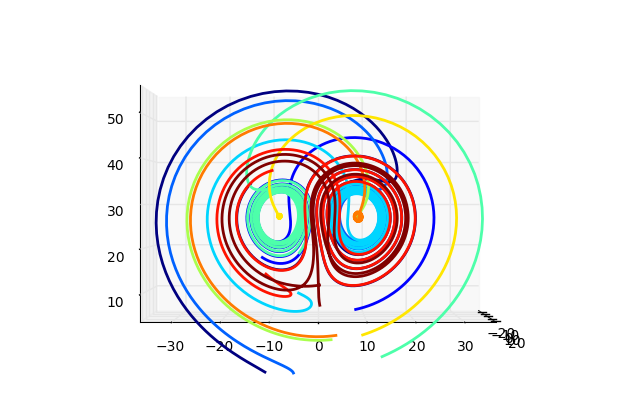

In [29]:
w = interactive(display_trajectories, angle=(0.,360.), N=(0,50), sigma=(0.0,50.0), rho=(0.0,50.0))
display(w)
